#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Temas 4 y 5: Agrupamiento / Clustering con el método Reglas de asociación y PCA
##### Alumno: Ibarra Ramírez Sergio </font>

### Reglas de asociación 

Vamos a definir nuestros datos para aplicar el algoritmo de relgas de asociación 

In [1]:
my_basket=[['bread','butter','wine','bananas','coffee','carrots'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['beer','chips','asparagus','salsa','milk','apples'],
           ['olive oil','bread','butter','tomatoes','steak','carrots'],
           ['tomatoes','onions','chips','wine','ketchup','orange juice'],
           ['bread','butter','beer','chips','milk'],
           ['butter','tomatoes','carrots','coffee','sugar'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['bread','butter','ketchup','coffee','chicken wings'],
           ['butter','beer','chips','asparagus','apples'],
           ['tomatoes','onion','beer','chips','milk','coffee']]

## En donde i será cada una de las filas 
## Z será todos aquellos (todas aquellas finlas) donde se encuentre la combinación definida  (en este caso bread-butter)

[all(z in i for z in ['butter', 'bread']) for i in my_basket]

[True, False, False, True, False, True, False, False, True, False, False]

Vamos a escribir una función para obtener frecuencias de items

In [2]:
def frecuencias(x,y):
    ##Lista de 1 para x si aparece True en frecuencia 
    fx_ = sum([x in i for i in my_basket])
    fy_ = sum([y in i for i in my_basket])
    fxy_ = sum([all(z in  i for z in (x,y))for i in my_basket])

    ## Definamos el support 
    support = fxy_ /len(my_basket)
    confidence = support / (fx_/len(my_basket))
    lift = confidence / (fy_/len(my_basket))


    print ('Support = {}'.format(round(support,2)))
    print ('Confidence = {}'.format(round(confidence,2)))
    print ('Lift = {}'.format(round(lift,2)))

In [3]:
frecuencias('butter', 'bread')

Support = 0.36
Confidence = 0.67
Lift = 1.83


#### Aplicación del algoritmo apriori 

In [4]:
import numpy as np 
import pandas as pd 

groceries = pd.read_csv("http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/groceries.csv", sep=";")
groceries

,ID,Transaction
0,0,"milk,bread,biscuit"
1,1,"bread,milk,biscuit,cereal"
2,2,"bread,tea"
3,3,"jam,bread,milk"
4,4,"tea,biscuit"
5,5,"bread,tea"
6,6,"tea,cereal"
7,7,"bread,tea,biscuit"
8,8,"jam,bread,tea"
9,9,"bread,milk"


In [5]:
### Biblioteca adicional para ML 
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori, association_rules

Apply es para aplicar a cada elemento de la lista transactions, una función que en este caso es la sorted para definir las transacciones de nuestra tabla de groceries

In [6]:
## Vamos a separar cada transacción como una lista
transactions = list(groceries['Transaction'].apply(lambda x: sorted(x.split(','))))
transactions

[['biscuit', 'bread', 'milk'],
 ['biscuit', 'bread', 'cereal', 'milk'],
 ['bread', 'tea'],
 ['bread', 'jam', 'milk'],
 ['biscuit', 'tea'],
 ['bread', 'tea'],
 ['cereal', 'tea'],
 ['biscuit', 'bread', 'tea'],
 ['bread', 'jam', 'tea'],
 ['bread', 'milk'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['coffee', 'sugar'],
 ['bread', 'coffee', 'orange'],
 ['biscuit', 'bread', 'sugar'],
 ['cereal', 'coffee', 'sugar'],
 ['biscuit', 'bread', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['cereal', 'coffee', 'milk', 'tea']]

Vamos a usar TransactionEncoder para obtener la matriz binaria 

In [7]:
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot

array([[ True,  True, False, False, False,  True, False, False, False],
       [ True,  True,  True, False, False,  True, False, False, False],
       [False,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True,  True, False, False, False],
       [ True, False, False, False, False, False, False, False,  True],
       [False,  True, False, False, False, False, False, False,  True],
       [False, False,  True, False, False, False, False, False,  True],
       [ True,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True, False, False, False,  True],
       [False,  True, False, False, False,  True, False, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [False, False, False,  True, False, False, False,  True, False],
       [False,  True, False,  True, False, False,  True, False, 

In [8]:
## Convertir el objeto onehot a un DataFrame 

onehot = pd.DataFrame(onehot, columns=encoder.columns_)
onehot

,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
0,True,True,False,False,False,True,False,False,False
1,True,True,True,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True
3,False,True,False,False,True,True,False,False,False
4,True,False,False,False,False,False,False,False,True
5,False,True,False,False,False,False,False,False,True
6,False,False,True,False,False,False,False,False,True
7,True,True,False,False,False,False,False,False,True
8,False,True,False,False,True,False,False,False,True
9,False,True,False,False,False,True,False,False,False


In [9]:
## Obtenemos el frequent itemset con ayuda del algoritmo apriori 

## Mandamos a allamar al algoritmo apriori sobre un conjunto de datos 
freq_items = apriori(onehot, min_support=0.01, max_len=3, use_colnames=True)
freq_items.tail(10)

,support,itemsets
44,0.05,"(bread, coffee, orange)"
45,0.10,"(sugar, bread, coffee)"
46,0.05,"(bread, milk, jam)"
47,0.05,"(bread, tea, jam)"
48,0.05,"(milk, cereal, coffee)"
49,0.10,"(cereal, coffee, orange)"
50,0.05,"(sugar, cereal, coffee)"
51,0.05,"(tea, cereal, coffee)"
52,0.05,"(tea, milk, cereal)"
53,0.05,"(tea, milk, coffee)"


In [10]:
## Generar las reglas de asociación 

## Recordar que en el caso de lift con mayor a 1.0 ya se consideaba que habia una alta probabilidad de que amos productos fueran adquirtidos juntos
rules = association_rules(freq_items, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cereal),(biscuit),0.30,0.40,0.15,0.500000,1.250000,0.0300,1.200000,0.285714
1,(biscuit),(cereal),0.40,0.30,0.15,0.375000,1.250000,0.0300,1.120000,0.333333
2,(milk),(biscuit),0.25,0.40,0.10,0.400000,1.000000,0.0000,1.000000,0.000000
3,(biscuit),(milk),0.40,0.25,0.10,0.250000,1.000000,0.0000,1.000000,0.000000
4,(biscuit),(orange),0.40,0.15,0.10,0.250000,1.666667,0.0400,1.133333,0.666667
...,...,...,...,...,...,...,...,...,...,...
111,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474
112,"(milk, coffee)",(tea),0.05,0.35,0.05,1.000000,2.857143,0.0325,inf,0.684211
113,(tea),"(milk, coffee)",0.35,0.05,0.05,0.142857,2.857143,0.0325,1.108333,1.000000
114,(milk),"(tea, coffee)",0.25,0.05,0.05,0.200000,4.000000,0.0375,1.187500,1.000000


Vamos a filtrar aquellas reglas que tengan como antecedente 2 elementos y cuyo lift sea alto 

In [11]:
## Vamos a filtrar aquellas reglas que tengan como antecedente 2 elementos y cuyo lift sea alto 

## Vamos a agregar una columna a nuestro data.Frame

## Para contar cuantos antecedentes hay en cada row
rules['lhs_items'] = rules.antecedents.apply(lambda x:len(x))

## Vamos a filtrar columnas de un data frame como dataFrame[dataFrame['Columna'] condicion ]
rules[rules['lhs_items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs_items
58,"(biscuit, coffee)",(orange),0.10,0.15,0.10,1.000000,6.666667,0.0850,inf,0.944444,2
52,"(cereal, biscuit)",(orange),0.15,0.15,0.10,0.666667,4.444444,0.0775,2.55,0.911765,2
64,"(bread, cereal)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474,2
111,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474,2
54,"(biscuit, orange)",(cereal),0.10,0.30,0.10,1.000000,3.333333,0.0700,inf,0.777778,2


In [12]:
## Ahora ordenados por confidence
rules[rules['lhs_items']>1].sort_values('confidence', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs_items
26,"(bread, cereal)",(biscuit),0.05,0.40,0.05,1.0,2.500000,0.0300,inf,0.631579,2
54,"(biscuit, orange)",(cereal),0.10,0.30,0.10,1.0,3.333333,0.0700,inf,0.777778,2
111,"(tea, coffee)",(milk),0.05,0.25,0.05,1.0,4.000000,0.0375,inf,0.789474,2
110,"(tea, milk)",(coffee),0.05,0.40,0.05,1.0,2.500000,0.0300,inf,0.631579,2
104,"(tea, milk)",(cereal),0.05,0.30,0.05,1.0,3.333333,0.0350,inf,0.736842,2


Vamos ahora a generar un heat map del resultado de las reglas de asociación 
Primero concatenamos los prductos antecedents y consequents 

In [13]:
## Generar un heatmmap del resultado de las reglas de asociación 

import seaborn as sns 

## Agregamos columnas concatenado los nombres de los productos 
## Vamos a crear una nueva columna llamada antecedentes_ 

rules['antecedentes_'] = rules.antecedents.apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules.consequents.apply(lambda a: ','.join(list(a)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs_items,antecedentes_,consequents_
0,(cereal),(biscuit),0.30,0.40,0.15,0.500000,1.250000,0.0300,1.200000,0.285714,1,cereal,biscuit
1,(biscuit),(cereal),0.40,0.30,0.15,0.375000,1.250000,0.0300,1.120000,0.333333,1,biscuit,cereal
2,(milk),(biscuit),0.25,0.40,0.10,0.400000,1.000000,0.0000,1.000000,0.000000,1,milk,biscuit
3,(biscuit),(milk),0.40,0.25,0.10,0.250000,1.000000,0.0000,1.000000,0.000000,1,biscuit,milk
4,(biscuit),(orange),0.40,0.15,0.10,0.250000,1.666667,0.0400,1.133333,0.666667,1,biscuit,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474,2,"tea,coffee",milk
112,"(milk, coffee)",(tea),0.05,0.35,0.05,1.000000,2.857143,0.0325,inf,0.684211,2,"milk,coffee",tea
113,(tea),"(milk, coffee)",0.35,0.05,0.05,0.142857,2.857143,0.0325,1.108333,1.000000,1,tea,"milk,coffee"
114,(milk),"(tea, coffee)",0.25,0.05,0.05,0.200000,4.000000,0.0375,1.187500,1.000000,1,milk,"tea,coffee"


Valores mayores a 1 undican de nuevo alta probabilidad, pero NO es cierto que entre más grande el valor sea indica más probabilidad 

In [14]:
pivot = rules[rules.lhs_items>1].pivot(index='antecedentes_', 
                                         columns='consequents_',
                                        values= 'confidence')
pivot

consequents_,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
antecedentes_,,,,,,,,,
"biscuit,coffee",NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN
"biscuit,orange",NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
"bread,biscuit",NaN,NaN,NaN,NaN,NaN,0.400000,NaN,0.400000,NaN
"bread,cereal",1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
"bread,coffee",NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.666667,NaN
"bread,jam",NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,0.5
"bread,milk",0.500000,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN
"bread,orange",NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
"bread,tea",NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN


Vamos ahora si a graficar el resultado (en este caso del confidence) en un heatmap 

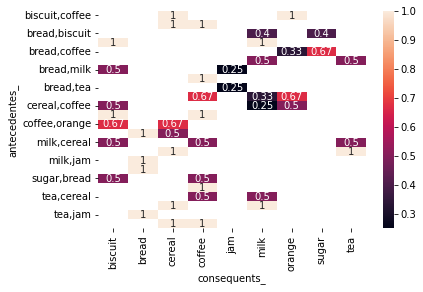

In [15]:
sns.heatmap(pivot, annot=True)
import matplotlib.pyplot as plt 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Se observa la utilidad del algoritmo de reglas de asociación para encontrar productos que seguramente se comprarán juntos siendo CONFIDENCE la métrica que en mi pipnión ayuda a explicar mejor la utilidad del algoritmo 

### PCA

In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

Vamos a usar un conjunto de datos sobre vinos

In [17]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(url,header=None)
df_wine.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


Aunque PCA se puede ejEcutar sin necesidad de tener conjunto de train y test, en este caso si se hará para una posterior verificación del modelo

In [18]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

array([[1.184e+01, 2.890e+00, 2.230e+00, ..., 9.600e-01, 2.520e+00,
        5.000e+02],
       [1.162e+01, 1.990e+00, 2.280e+00, ..., 1.160e+00, 2.960e+00,
        3.450e+02],
       [1.368e+01, 1.830e+00, 2.360e+00, ..., 1.230e+00, 2.870e+00,
        9.900e+02],
       ...,
       [1.179e+01, 2.130e+00, 2.780e+00, ..., 9.700e-01, 2.440e+00,
        4.660e+02],
       [1.373e+01, 4.360e+00, 2.260e+00, ..., 7.800e-01, 1.750e+00,
        5.200e+02],
       [1.233e+01, 9.900e-01, 1.950e+00, ..., 1.060e+00, 2.310e+00,
        7.500e+02]])

Vamos a hacer la estandarización de nuestros datos para aplicar el modelo PCA

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # Add parentheses to initialize the StandardScaler object


## Cuando uno ajusta el modelo se ajusta con los datos de entrenamienmt
X_train_std = sc.fit_transform(X_train)  # Pass X_train as an argument to fit_transform()

## Y para le prueba YA NO SE AJUSTE, SOLO SE TRANSFORMA
X_test_std = sc.transform(X_test)

X_train_std

array([[-1.31403552,  0.46995658, -0.47116991, ...,  0.02082008,
        -0.17439427, -0.7386016 ],
       [-1.57864679, -0.30565942, -0.29423148, ...,  0.91105814,
         0.47509046, -1.2360409 ],
       [ 0.89907693, -0.44354671, -0.01113   , ...,  1.22264146,
         0.34224131,  0.83394845],
       ...,
       [-1.37417444, -0.18500805,  1.47515279, ...,  0.06533199,
        -0.2924824 , -0.84771732],
       [ 0.95921586,  1.73679605, -0.36500685, ..., -0.78039417,
        -1.31099255, -0.67441588],
       [-0.72467405, -1.16745498, -1.4620251 , ...,  0.46593911,
        -0.48437562,  0.06371985]])

Para obtener matriz de covarianza, eigenvalores y eigenvectores
Se obtiene tantos eigenvalores como número de variables originales 

In [20]:

## Se construye la matriz de covarianza de X_train transpuesta
cov_mat = np.cov(X_train_std.T)

## Se obtienen los eigenvectores y eigenvalores de la matriz de covarianza

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('Eigenvals:', eigen_vals)
print('Eigenvecs:', eigen_vecs)

Eigenvals: [4.50334357 2.57695558 1.58408135 0.91875328 0.97096683 0.65407621
 0.54855057 0.10235041 0.14363563 0.34119059 0.29150298 0.22259445
 0.2476896 ]
Eigenvecs: [[ 0.11727872  0.49273096 -0.20986449  0.29445886  0.02399568  0.16730873
   0.09449203 -0.14540981  0.31726214  0.34907371  0.44644632 -0.26049895
   0.25375239]
 [-0.24806159  0.2167371   0.07293222 -0.12046288  0.57153594  0.43765049
   0.44856891  0.06642167 -0.11328572  0.06694755 -0.01817534  0.17705218
  -0.3144033 ]
 [-0.01953459  0.25064733  0.6471723   0.15054379 -0.17989228  0.20400837
  -0.15051265 -0.17871101 -0.08548979 -0.10968746 -0.14495656 -0.49818918
  -0.27961021]
 [-0.25288803 -0.07096753  0.57719958 -0.04053029  0.01243183 -0.04352929
  -0.19031512  0.07285477  0.17444092  0.52982551  0.06001886  0.40071694
   0.27804881]
 [ 0.13701103  0.28039033  0.126847   -0.67787214 -0.42855573  0.21084466
   0.18833432  0.05825666  0.07849897 -0.24541926  0.21562853  0.14714558
   0.15965312]
 [ 0.39930387  0

Vamos a construir una gráfica que nos ayude a identificar cuales son los eigenvalores más grandes que serían aquellas caracterisrticas / valores originales que más varianza capturan/ aportan 

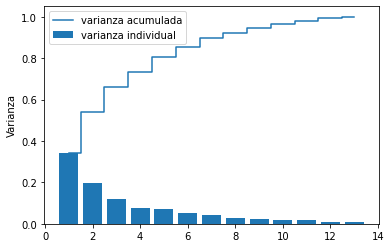

In [21]:
## Grafica con los aportes de cada eigenvalor 

tot = sum(eigen_vals)
## Para cada eigenvalor dividir su valor entre el total de la suma de eigen_vals
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]


## Se va sumando los valores de las varianzas apaortadas por cada eigen_val 
cum_var_exp = np.cumsum(var_exp)

## Las varianzas individuales se grafican como barras
plt.bar(range(1,14), var_exp, label='varianza individual', align='center')

##La varianza acumulada se grafica como step 
plt.step(range(1,14), cum_var_exp, where='mid', label='varianza acumulada')
plt.legend(loc='best')
plt.ylabel('Varianza')
plt.show()

Vamos a formar una especie de pares de eigenvalores, eigenvectores 

In [22]:
eigen_par = [(np.abs(eigen_vals[i]), eigen_vecs[i])
             for i in range(len(eigen_vals))]

## Obetendremos un array de tuplas de (eigen_val, eigen_vec) 
#eigen_par

## Ordenando por eigen_vals desdendentemente 

eigen_par.sort(key=lambda k: k[0], reverse=True)
eigen_par[-1]

(0.10235040938399302,
 array([-0.31872978,  0.02016036,  0.22899513,  0.39060119, -0.10479304,
        -0.30196489,  0.55655498,  0.04787259,  0.07714213, -0.4290755 ,
         0.09130356,  0.06706033,  0.27549428]))

Nos vamos a quedar solo con los dos primeros eigen valores y vamos a construir la matriz de proyección 

In [23]:
W = np.hstack((eigen_par[0][1][:,np.newaxis],
               eigen_par[1][1][:,np.newaxis]))

print('Matriz de proyeccion W: \n', W)

Matriz de proyeccion W: 
 [[ 0.11727872 -0.24806159]
 [ 0.49273096  0.2167371 ]
 [-0.20986449  0.07293222]
 [ 0.29445886 -0.12046288]
 [ 0.02399568  0.57153594]
 [ 0.16730873  0.43765049]
 [ 0.09449203  0.44856891]
 [-0.14540981  0.06642167]
 [ 0.31726214 -0.11328572]
 [ 0.34907371  0.06694755]
 [ 0.44644632 -0.01817534]
 [-0.26049895  0.17705218]
 [ 0.25375239 -0.3144033 ]]


De un vector de 1x13, tenemos ahora uno de 1x2

In [24]:
print('Original: ', X_train_std[0])

print('Proyectada: ', X_train_std[0].dot(W))

Original:  [-1.31403552  0.46995658 -0.47116991 -0.47598407  0.82093292 -0.92739883
 -0.72932033  0.53098402 -1.21296926 -0.98374921  0.02082008 -0.17439427
 -0.7386016 ]
Proyectada:  [-1.10633802  0.49474422]


Transformando TODO el conjuntode datos de entrenamiento 

In [25]:
## Transformando TODOel conjuntode datos de entrenamiento 
X_train_PCA = X_test_std.dot(W) 
X_train_PCA

array([[ 3.17573018e-01, -1.73751806e+00],
       [-2.39706181e-01, -1.34854644e+00],
       [ 3.04882256e-01,  4.15055643e-02],
       [-5.72306823e-01, -7.44940627e-01],
       [-5.06512235e-01, -2.79223997e-01],
       [ 3.50551012e-01,  1.62459666e+00],
       [-7.51974714e-01, -1.03526969e+00],
       [ 5.88168680e-01,  6.18832781e-01],
       [-1.78391856e-02, -6.31347755e-01],
       [ 1.41202668e+00, -6.48941309e-01],
       [-1.50634480e+00,  9.80016496e-03],
       [ 6.33991264e-01, -3.21792157e-01],
       [-1.02435270e+00, -1.10349862e+00],
       [ 7.69157754e-01,  7.04459298e-01],
       [ 1.60190155e+00,  1.84912997e+00],
       [ 2.04457105e-02, -9.20260305e-01],
       [ 1.07610287e-01,  9.96629823e-01],
       [-4.94129505e-01, -1.41055619e+00],
       [ 5.22176799e-01,  7.55425501e-01],
       [-9.53143266e-01, -5.77326369e-01],
       [ 1.21810122e+00,  7.99117971e-01],
       [ 1.01745838e+00,  7.68308853e-02],
       [ 9.72178233e-01, -4.90188548e-01],
       [ 1.

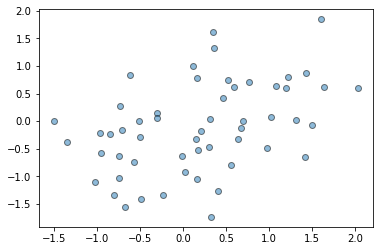

In [27]:
colors = np.array([None, 'red', 'blue', 'green'])
y = y_train
plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1],
 alpha=0.5, edgecolor='black')

##### Vamos a aplicar un modelo de PCA (de sklearn) +  un modelo de regresión logistica para clasificación de los 3 tipos de vinos, usando solamrnte las variables 'ya reducidas'

In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(url,header=None)
df_wine.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [29]:
from tables import tests
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # Add parentheses to initialize the StandardScaler object


## Cuando uno ajusta el modelo se ajusta con los datos de entrenamienmt
X_train_std = sc.fit_transform(X_train)  # Pass X_train as an argument to fit_transform()

## Y para le prueba YA NO SE AJUSTE, SOLO SE TRANSFORMA
X_test_std = sc.transform(X_test)

X_train_std


array([[-1.20689431, -0.87784005,  0.49533996, ..., -0.07180768,
         0.78923085, -1.16730394],
       [-0.86412645,  1.31212767,  0.02913764, ..., -1.64063463,
        -1.44031558, -0.76219006],
       [-0.68050081, -1.01246921, -0.47591487, ..., -0.83502079,
        -1.53725238, -0.3720804 ],
       ...,
       [ 0.16417711, -0.52780423, -0.90326699, ...,  0.43700105,
         1.08004125,  0.82825702],
       [-1.74552951, -0.27649645,  0.33993919, ...,  0.22499741,
         0.17991381, -0.28205509],
       [ 0.01727661,  1.37495462, -0.04856274, ..., -1.5982339 ,
        -1.78651844, -0.67216475]])

Importamos las librerias necesarias para PCA y para LogisticRegression

In [30]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

Creamos los objetos de PCA y LogisticRegression, así como entrenar y aplicar el PCA

In [31]:

## Se crea el objeto PCA defineidno el n_components con que 'nos quedaremos' 
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

## Se entrena el modelo PCA 

X_train_PCA_sk_learn = pca.fit_transform(X_train_std)


# Se hace la transformación / aplica el PCA ya entrenado para los X_test
X_test_PCA_sk_learn = pca.transform(X_test_std)


X_test_PCA_sk_learn

array([[-1.98551385e+00,  2.19693823e-01],
       [ 2.35921892e+00, -3.28425399e-01],
       [-3.14513706e-01,  2.17201522e+00],
       [-1.72050997e+00,  1.44446908e+00],
       [ 5.87407344e-01,  5.82241336e-01],
       [-9.41432519e-01,  1.51563182e+00],
       [ 2.65858103e+00, -4.09285592e-01],
       [ 8.77228294e-01,  3.44003051e-01],
       [ 1.60214014e+00,  1.47374442e+00],
       [ 1.21195815e+00, -3.05350633e+00],
       [-2.85072630e-01,  1.33398131e+00],
       [ 5.81502948e-01,  2.56562709e+00],
       [ 8.60315538e-01,  2.41020663e+00],
       [ 4.01289190e+00, -3.05258484e-01],
       [ 2.96500107e+00, -1.74468853e+00],
       [ 2.49114857e+00, -2.32173860e+00],
       [-3.31011369e+00, -9.98327291e-01],
       [-2.32183164e+00, -1.08483928e+00],
       [-1.99455964e+00, -1.03514256e+00],
       [ 3.18279755e-01,  2.02894802e+00],
       [ 5.72318269e-01,  2.26687262e+00],
       [ 1.49727759e+00,  1.51156567e+00],
       [-2.16928419e+00,  1.87643631e+00],
       [-7.

También se entrena el modelo de LogisticRegression

In [32]:
lr.fit(X_train_PCA_sk_learn, y_train)

LogisticRegression(solver='liblinear')

Ahora vamos a graficar los resultados de la clasificación con Regresion Logistica (primero para los datos de train)

<AxesSubplot:>

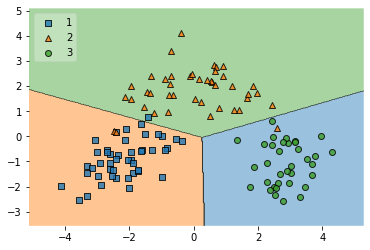

In [33]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_PCA_sk_learn, y_train, clf=lr, legend=2)

Ahora veamos como se ve el de test

<AxesSubplot:>

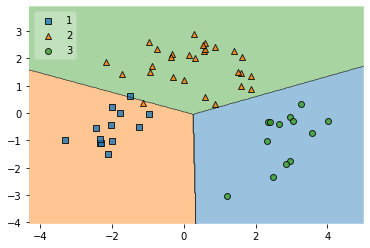

In [34]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test_PCA_sk_learn, y_test, clf=lr, legend=2)

EL modelo PCA permte obtener las carácterísticas 'más importantes' en un data set para alimentar modelos de claificación que sean más livianos computacionalmente hablando  